In [1]:
import matplotlib.pyplot as plt
import random
from typing import List, Optional
import time

In [2]:
def bubble_sort(arr: List[int]) -> None:
    done = False
    while not done:
        done = True
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                done = False
    return


def insertion_sort(arr: List[int]) -> None:
    for i in range(len(arr)):
        best = len(arr) - i - 1
        for j in range(len(arr) - i - 1):
            if best is None or arr[j] > arr[best]:
                best = j
        last_index = len(arr) - i - 1
        arr[best], arr[last_index] = arr[last_index], arr[best]
    return


def merge_sort(arr: List[int]) -> None:
    start = 0
    end = len(arr)

    if end - start <= 1:
        return

    mid = (end + start) // 2
    l = arr[start:mid]
    r = arr[mid:end]
    merge_sort(l)
    merge_sort(r)
    li = 0
    ri = 0

    for i in range(start, end):
        minim = None
        if li < len(l) and (ri >= len(r) or l[li] <= r[ri]):
            minim = l[li]
            li += 1
        else:
            minim = r[ri]
            ri += 1
        arr[i] = minim
    return


def quick_sort(arr: List[int], start: int = 0, end: Optional[int] = None):
    if end is None:
        end = len(arr)
    if end - start <= 1:
        return
    if end - start == 2:
        if arr[start] > arr[start + 1]:
            arr[start], arr[start + 1] = arr[start + 1], arr[start]
        return
    l = start
    r = end - 1
    pivot = arr[(l + r) // 2]
    while l < r:
        while arr[l] < pivot:
            l += 1
        while arr[r] > pivot:
            r -= 1
        if l >= r:
            break
        arr[l], arr[r] = arr[r], arr[l]
        l += 1
        r -= 1

    quick_sort(arr, start=start, end=r + 1)
    quick_sort(arr, start=l, end=end)


def python_sort(arr):
    arr.sort()

In [3]:
funcs = (bubble_sort, insertion_sort, merge_sort, quick_sort, python_sort)

random.seed(42)
arr1000 = list(range(1000))
random.shuffle(arr1000)
arrs = [[64, 34, 25, 12, 22, 11, 90, -5, 0, 64, -2], arr1000]

for arr in arrs:
    expected = sorted(arr)

    for func in funcs:
        arr_copy = arr.copy()
        func(arr_copy)
        assert arr_copy == expected, f"Func {func.__name__} failed, {arr_copy}"
print("Functions seem to work correctly")

Functions seem to work correctly


In [4]:
memoise = {}


def timeit(func, arr_length: int = 1000, repeat_count: int = 100) -> List[float]:
    key = (func.__name__, arr_length, repeat_count)
    if key not in memoise:
        random.seed(42)
        times = []
        for _ in range(repeat_count):
            arr = list(range(arr_length))
            random.shuffle(arr)

            start = time.time()
            func(arr)
            eclapsed = (time.time() - start) * 1e3
            times.append(eclapsed)
        memoise[key] = times
    return memoise[key]

In [5]:
def mean(arr):
    return sum(arr) / len(arr)


def median(arr):
    arr.sort()
    mid = len(arr) // 2
    if len(arr) % 2 == 1:
        return arr[mid]
    return (arr[mid] + arr[mid - 1]) / 2


def std(arr):
    m = mean(arr)
    var = mean([(i - m) ** 2 for i in arr])
    return var**0.5

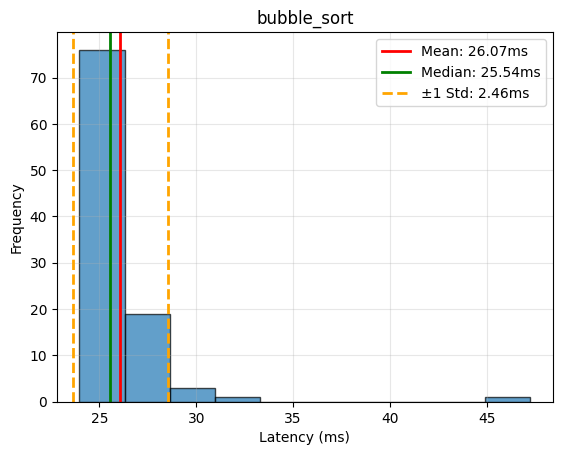

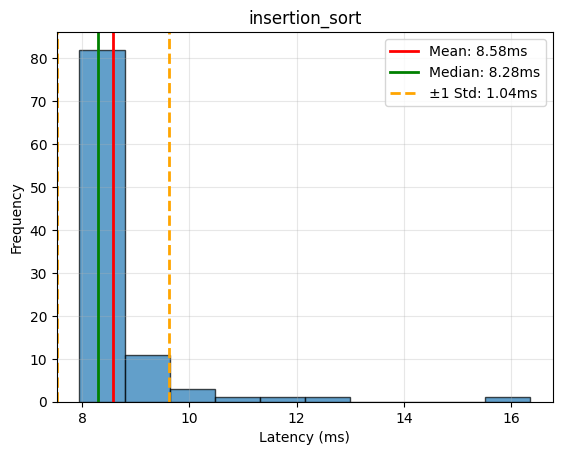

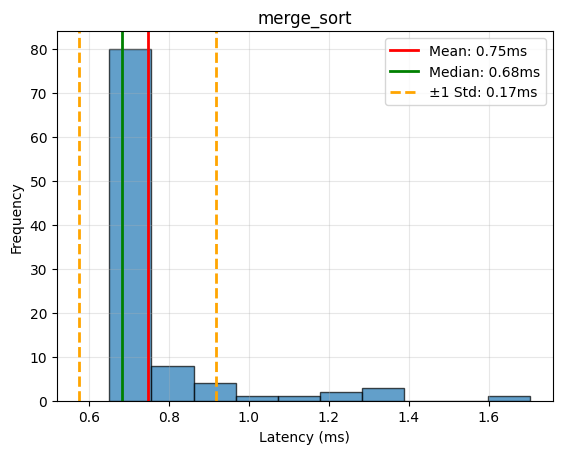

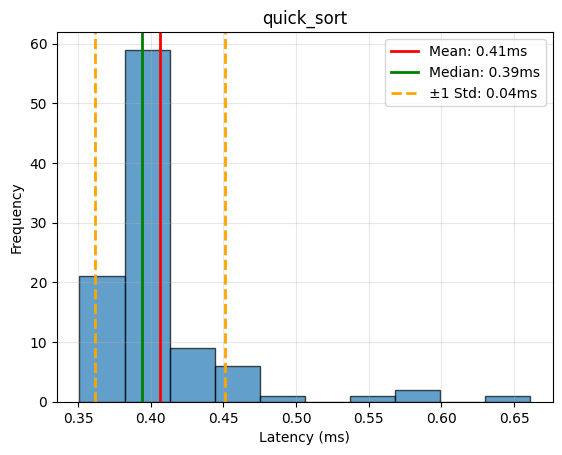

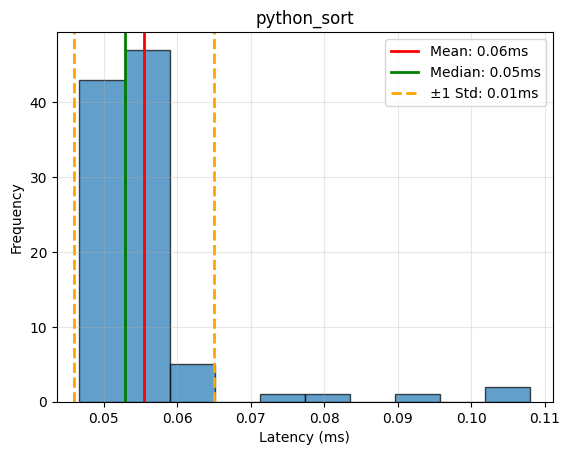

In [6]:
def plot_latency(func):
    latencies = timeit(func)
    mean_latency = mean(latencies)
    median_latency = median(latencies)
    std_latency = std(latencies)

    plt.hist(latencies, bins=10, alpha=0.7, edgecolor="black")

    plt.axvline(
        mean_latency, color="red", linewidth=2, label=f"Mean: {mean_latency:.2f}ms"
    )
    plt.axvline(
        median_latency,
        color="green",
        linewidth=2,
        label=f"Median: {median_latency:.2f}ms",
    )
    plt.axvline(
        mean_latency + std_latency,
        color="orange",
        linestyle="--",
        linewidth=2,
        label=f"±1 Std: {std_latency:.2f}ms",
    )
    plt.axvline(mean_latency - std_latency, color="orange", linestyle="--", linewidth=2)

    plt.xlabel("Latency (ms)")
    plt.ylabel("Frequency")
    plt.title(func.__name__)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


for func in funcs:
    plot_latency(func)

Yes all of the distributions are skewed.

In [7]:
def kurt(latencies: List[float]):
    mean_latency = mean(latencies)
    std_latency = std(latencies)
    fourth_moment = lambda latency: ((latency - mean_latency) / std_latency) ** 4
    return mean([fourth_moment(latency) for latency in latencies])


for func in funcs:
    print(func.__name__, kurt(timeit(func)))

bubble_sort 55.48400681104281
insertion_sort 33.47641593780512
merge_sort 14.600047533419012
quick_sort 16.24344111448455
python_sort 20.127771004136267


Insertion sort has the least kurtoisis and this means that insertion sort will probably has the most consistent running time no matter how much array is shuffled. (in contrast to something like quick sort, where it is known that for some special cases it can run in O(n^2) instead of its average O(nlogn).)

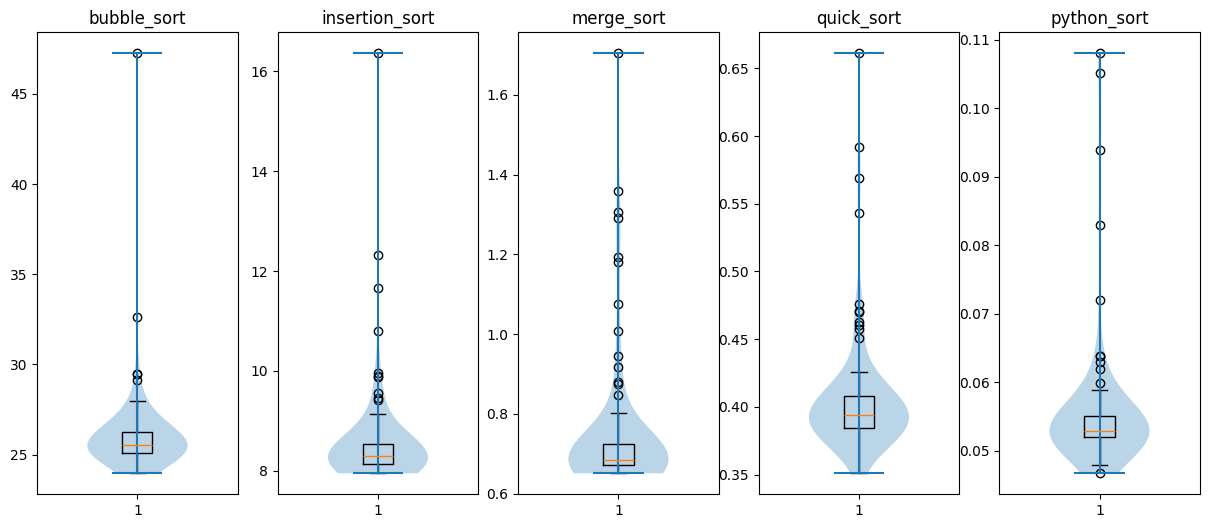

In [8]:
plt.figure(figsize=(15, 6))
for i in range(len(funcs)):
    plt.subplot(1, len(funcs), i + 1)
    plt.title(funcs[i].__name__)
    plt.boxplot(timeit(funcs[i]))
    plt.violinplot(timeit(funcs[i]))

It seems merge sort has the most outlier, which is odd since its kuroisis was second minimum.